<a href="https://colab.research.google.com/github/LazySeagull/classification_algo_mnist_beginning_practice_sklearnbook/blob/main/classification_algo_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#the mnist dataset

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784' , version = 1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
X , y = mnist["data"] , mnist["target"]


#i.e its a collection of 70k images in 28x28 pixel each which will make 784
#each image in each row obv





In [ ]:
print(X.shape)
print(y.shape)


(70000, 784)
(70000,)


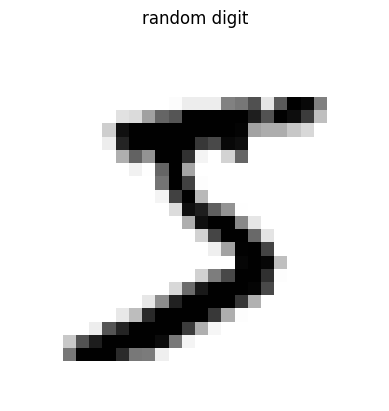

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt


shape = X.iloc[0]
shape_reshape = shape.values.reshape(28 , 28) #28x28 pixel image  used the values
                                              #thing to conver the pandas series which is a one
                                              #dimensional array into a numpy array so we can use reshape here


plt.imshow(shape_reshape , cmap = "binary")
plt.axis("off")
plt.title("random digit")
plt.show()

In [ ]:
print(y[0]) #thats basically the target value which is basically the output

5


In [ ]:
#classification training

In [ ]:
#wait lemme have some fun before

def print_images(n : int) -> None:
  for i in range(n+1):
    shape_pixel_array = X.iloc[i]
    shape_reshape_yeah = shape_pixel_array.values.reshape(28,28)
    plt.imshow(shape_reshape_yeah , cmap="binary")
    plt.axis("off")
    plt.show()



In [ ]:
#now we will do the training

#first 60k for train and last 10k for test
X_train , X_test , y_train , y_test = X[:60000] , X[60000:] , y[:60000] , y[60000:]


In [ ]:

#its a strinig that why the classification algo isnt working it expects integer
print(type(y_train[0]))
#so we will convert

y_train = y_train.astype(int)
y_test = y_test.astype(int)

type(y_train[0])

<class 'str'>


numpy.int64

In [ ]:
#training a binary classifier

#it means we will train the model for now to determine only one digit

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [ ]:
from sklearn.linear_model import SGDClassifier


sgd_clf = SGDClassifier(random_state = 42) #create instance
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [ ]:
#now we will test

sgd_clf.predict([shape])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [ ]:
sgd_clf.predict([X_train.iloc[1]])



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([False])

In [ ]:
print(y_train[1])

0


In [ ]:
#performance measures for the sdg classification model

#CROSS VALIDATION

from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf , X_train, y_train_5 ,  cv = 3 , scoring = "accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [ ]:
#the dumb classifier
import numpy as np
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
  def fit(self , X , y=None):
    return self

  def predict(self , X):
    return np.zeros((len(X) , 1) ,dtype=bool)


In [ ]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf , X_train , y_train_5 , cv=3 , scoring= "accuracy")

array([0.91125, 0.90855, 0.90915])

In [ ]:
# ACCURACY IS GENERALLY NOT THE BEST PERFORMANCE MEASURE FOR CLASSIFIERS

'''

this is because like the accuracy of the dumb model is 90% of not 5 which means
that only 10 percent of the images are 5 and our model is giving 96 percent accuracy
on both the 5 and not 5 images it means out of all 5 and not 5 five images it
was correct to determine the the label over 96 percent of time it dosent tell
us that how good was it in predicitng five
'''

'\n\nthis is because like the accuracy of the dumb model is 90% of not 5 which means\nthat only 10 percent of the images are 5 and our model is giving 96 percent accuracy\non both the 5 and not 5 images it means out of all 5 and not 5 five images it\nwas correct to determine the the label over 96 percent of time it dosent tell\nus that how good was it in predicitng five\n'

In [ ]:
#CONFUSION MATRIX

''' for confusion matrix we first need a set of predictions so
they can be comapred to the actual output
'''

#we can use the cross val predict function for predictions


' for confusion matrix we first need a set of predictions so\nthey can be comapred to the actual output\n'

In [ ]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf , X_train , y_train_5 , cv = 3)

In [ ]:
#the cross val predict is same as the cross val score but instead of returning the score it returns the predictions

In [ ]:
#making the confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5 , y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [ ]:
'''
  each row in the confusion matrix represents an actual case while each column
  respresrents a predicted class

  the first row contains all the non 5 images ( the negative class) 53892 were
  correctly predicted (true negative) as non 5 while 687 were falsely predicted as 5 (false postive)
  the second row contains the 5s , 1891 of em wrongly classified as non 5 (false negative) and 3530 of em
  were correctly predicted as 5 (true postive)

  juttha sach
  saccha juth
  juuth juth
  saccha sach
'''

'\n  each row in the confusion matrix represents an actual case while each column\n  respresrents a predicted class\n\n  the first row contains all the non 5 images ( the negative class) 53892 were\n  correctly predicted (true negative) as non 5 while 687 were falsely predicted as 5 (false postive)\n  the second row contains the 5s , 1891 of em wrongly classified as non 5 (false negative) and 3530 of em\n  were correctly predicted as 5 (true postive)\n\n  juttha sach\n  saccha juth\n  juuth juth\n  saccha sach\n'

In [ ]:
#for a good classifier the diagoanls should be 0 which is false positive and false negative

In [ ]:
#precision and recall

# precison = TP / (TP + FP)
# recall = TP / (TP + FN)

In [ ]:
from sklearn.metrics import precision_score , recall_score

print(round(precision_score(y_train_5 , y_train_pred)*100 ,2) , "%\n")
print(round(recall_score(y_train_5 , y_train_pred) * 100 ,2) ,"%")

83.71 %

65.12 %


In [ ]:
# THE F1 SCORE IS THE HARMONIC MEAN OF THE PRECISION AND RECALL
# SO ITS BETTER TO COMPUTE THE F1 SCORE

from sklearn.metrics import f1_score
f1_score(y_train_5 , y_train_pred)


0.7325171197343847

In [ ]:
y_scores = sgd_clf.decision_function([shape])
y_scores


# it basically tells how confident the model is
# very confident in this case

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([2164.22030239])

In [ ]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

#sdg uses same threshold which is 0



print(y_some_digit_pred)

[ True]


In [ ]:
#now we will raise the threshold

#now we shift the threshold

#like the book explained in the precision recall tradeoff iykyk

threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [ ]:
#raising the threshold decreases recall in this case which is basically out of
#how many total 5 how many were it able to tell true

In [ ]:
#to decide which threshold to use we can use the cross_val_predict() function
# to get scores of all the instances in the training set
#but this time we will specify that we watn to return the decision scores instead of predicitons

In [ ]:
y_scores = cross_val_predict(sgd_clf , X_train , y_train_5 , cv = 3 ,
                             method = "decision_function")

In [ ]:
#now use precision_recall_function to compute precision and recall for all
#possible thresholds

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions , recalls , thresholds = precision_recall_curve(y_train_5 , y_scores)

In [ ]:
#finally use matplot lib to plot precision and recall as functions of thrshold value



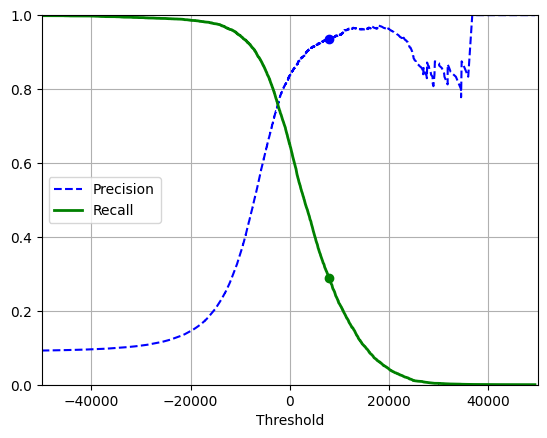

In [ ]:
def plot_precision_recall_vs_theshold(precisions , recalls , thresholds , highlight = 0):
  plt.plot(thresholds , precisions[:-1] , "b--" , label="Precision")
  plt.plot(thresholds , recalls[:-1] , label="Recall" , linewidth = 2 ,  color = "green")
  plt.legend(loc="center left")
  plt.grid(True)
  plt.xlabel("Threshold")

  idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
  plt.plot(thresholds[idx], precisions[idx], "bo")
  plt.plot(thresholds[idx], recalls[idx], "go")
  plt.axis([-50000, 50000, 0, 1])

plot_precision_recall_vs_theshold(precisions , recalls , thresholds)
plt.show()

In [ ]:
#say we wanna aim for 90% precision we can search for the lowest threshold that
# gives at least 90% precision

threshold_90_prcision = thresholds[np.argmax(precisions >= 0.90)]

In [ ]:
y_train_pred_90 = (y_scores > threshold_90_prcision)
print(precision_score(y_train_5 , y_train_pred_90))
print(recall_score(y_train_5 , y_train_pred_90))

0.9
0.47980077476480354


In [ ]:
# THE ROC CURVE

In [ ]:
from sklearn.metrics import roc_curve

fpr , tpr , thresholds = roc_curve(y_train_5 , y_scores)

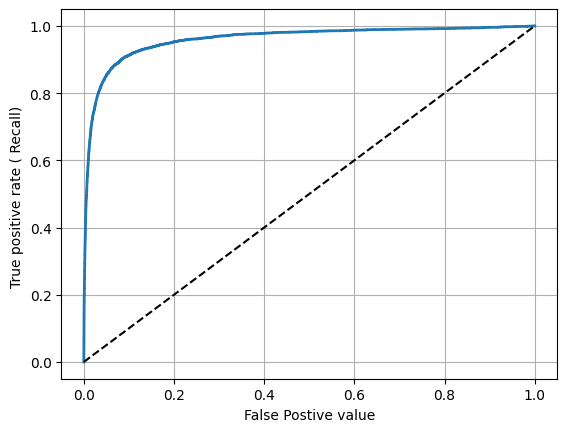

In [ ]:
def plot_roc_curve(fpr , tpr , label = None):
  plt.plot(fpr , tpr , linewidth=2 , label = label)
  plt.plot([0,1] , [0,1] , 'k--')
  plt.grid()
  plt.xlabel("False Postive value")
  plt.ylabel("True positive rate ( Recall) ")

plot_roc_curve(fpr , tpr)
plt.show()

In [ ]:
# one way to measure classifier is to measure the area under the curve

In [ ]:
# perfect classifier will have roc area under curve equal to 1 whereas a random will have roc auc equal to 0.5

In [ ]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train_5 , y_scores))

0.9604938554008616


In [ ]:
#compare roc score for sdc and random forest classifier


In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state = 42)
y_probas_forest = cross_val_predict(forest_clf , X_train , y_train_5 , cv = 3 ,
                                    method = "predict_proba")

#it has predict proba instead of decision_function

In [ ]:
y_scores_forest = y_probas_forest[: , 1]
fpr_forest , tpr_forest , thresholds_forest = roc_curve(y_train_5 , y_scores_forest)

In [ ]:
#plot

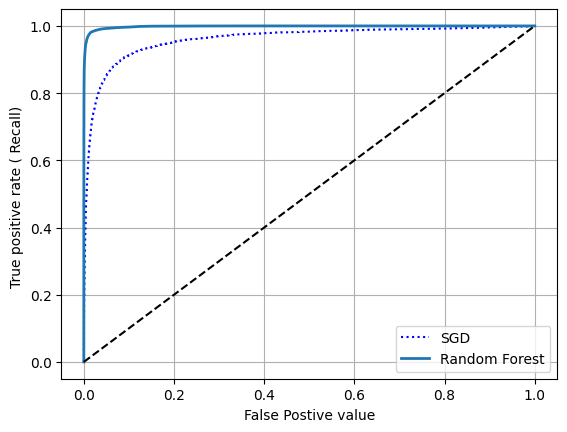

In [ ]:
plt.plot(fpr , tpr , "b:" , label="SGD")
plot_roc_curve(fpr_forest , tpr_forest , "Random Forest")
plt.legend(loc = "lower right")
plt.show()

In [ ]:
roc_auc_score(y_train_5 , y_scores_forest)

np.float64(0.9983436731328145)

In [ ]:
y_train_pred_forest = cross_val_predict(forest_clf , X_train , y_train_5 , cv = 3)


In [ ]:
print(recall_score(y_train_5 , y_train_pred_forest))
print(precision_score(y_train_5 , y_train_pred_forest))

0.8662608374838591
0.9905083315756169


In [ ]:
#multiclass classification

In [ ]:
#basicallly the book described about the ovr and ovo stratefy like when we wanna use
#binary classifier to use for multiclaass classification

In [138]:
# like svm or support vector machine uses ovo better so lets train one on our original dataset

from sklearn.svm import SVC
svm_classifier = SVC()
svm_classifier.fit(X_train , y_train)


SVC()

In [ ]:
#now we can predict init am waiting for the model training lol i mean it has to
# create hella models so make sense lol idk am cooked ;-;
# cmo'n or cmon' idk i forgor the spelling anyways i was saying cmo'n or cmon'
# bro train fucking goddammit man fucking hell
#finally trained lol


In [ ]:
X_train.shape

In [ ]:
some_radnomA_image = X_train.iloc[1]

In [ ]:
svm_classifier.predict([some_radnomA_image])


In [ ]:
y_train[1]

In [ ]:
scores_svm = svm_classifier.decision_function([some_radnomA_image])
scores_svm

In [ ]:
# scaling the thing

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))


In [ ]:
# error analysis



In [ ]:
#look at the confusion matrix

In [ ]:
y_train_pred = cross_val_predict(forest_clf , X_train_scaled , y_train , cv = 3)
conf_matrix = confusion_matrix(y_train , y_train_pred)
conf_matrix

array([[5840,    1,    8,    2,    4,    9,   20,    1,   35,    3],
       [   1, 6634,   43,   12,   13,    5,    6,   13,   12,    3],
       [  26,   12, 5749,   29,   32,    5,   20,   37,   42,    6],
       [   7,    7,   93, 5809,    3,   63,    7,   49,   61,   32],
       [  12,   13,   14,    1, 5643,    0,   29,   14,   17,   99],
       [  20,    9,    9,   65,   13, 5195,   53,    6,   32,   19],
       [  25,   11,    5,    0,   12,   45, 5805,    0,   15,    0],
       [   4,   24,   58,    6,   37,    1,    0, 6037,   11,   87],
       [   9,   35,   44,   53,   26,   52,   27,    5, 5524,   76],
       [  21,   10,   13,   76,   75,   15,    3,   58,   45, 5633]])

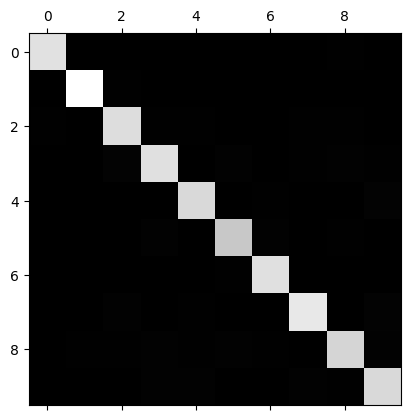

In [142]:
#imiagte representaion

plt.matshow(conf_matrix , cmap = plt.cm.gray)
plt.show()

In [144]:
row_sums = conf_matrix.sum(axis = 1 , keepdims = True)
norm_conf_mx = conf_matrix/row_sums

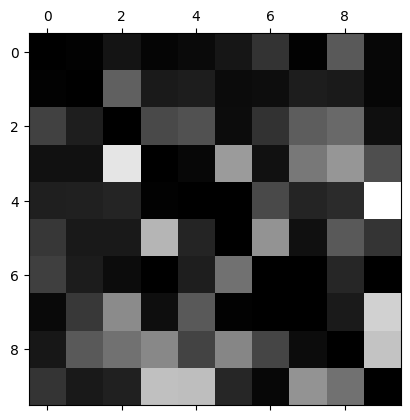

In [145]:
np.fill_diagonal(norm_conf_mx , 0)
plt.matshow(norm_conf_mx , cmap = plt.cm.gray)
plt.show()

In [153]:
cl_a , cl_b = '3' , '5'
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

In [154]:
size = 5
pad = 0.2
plt.figure(figsize=(size, size))
for images, (label_col, label_row) in [(X_ba, (0, 0)), (X_bb, (1, 0)),
                                       (X_aa, (0, 1)), (X_ab, (1, 1))]:
    for idx, image_data in enumerate(images[:size*size]):
        x = idx % size + label_col * (size + pad)
        y = idx // size + label_row * (size + pad)
        plt.imshow(image_data.reshape(28, 28), cmap="binary",
                   extent=(x, x + 1, y, y + 1))
plt.xticks([size / 2, size + pad + size / 2], [str(cl_a), str(cl_b)])
plt.yticks([size / 2, size + pad + size / 2], [str(cl_b), str(cl_a)])
plt.plot([size + pad / 2, size + pad / 2], [0, 2 * size + pad], "k:")
plt.plot([0, 2 * size + pad], [size + pad / 2, size + pad / 2], "k:")
plt.axis([0, 2 * size + pad, 0, 2 * size + pad])
plt.xlabel("Predicted label")
plt.ylabel("True label")

plt.show()

#whatever idk


AttributeError: 'str' object has no attribute 'reshape'

<Figure size 500x500 with 0 Axes>

In [155]:
#multilabel classification


#a classification system taht outputs multiple binary tags is the multilabel classification



In [156]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large , y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train , y_multilabel)

KNeighborsClassifier()

In [158]:
knn_clf.predict([X_train.iloc[0]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[False,  True]])

In [173]:
y_train_knn_pred = cross_val_predict(knn_clf , X_train , y_multilabel , cv = 3)
f1_score(y_multilabel , y_train_knn_pred , average = "macro")

0.9764102655606048

In [163]:
# multioutput classification

noise = np.random.randint(0 , 100 , (len(X_train) , 784))
X_train_mod = X_train + noise
noise = np.random.randint(0 , 100 , (len(X_test) , 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

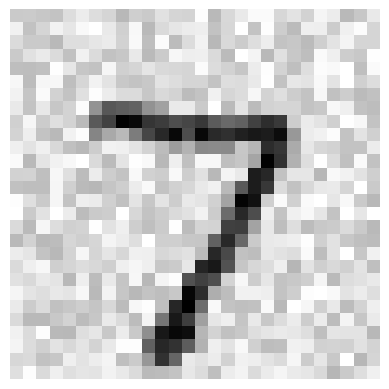

In [170]:
plt.imshow(X_test_mod.iloc[0].values.reshape(28 , 28) , cmap = "binary")
plt.axis("off")

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

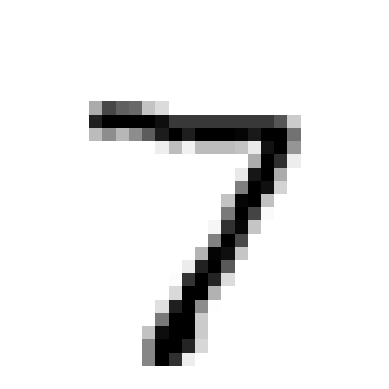

In [171]:
plt.imshow(X_test.iloc[0].values.reshape(28 , 28) , cmap = "binary")
plt.axis("off")

In [175]:
knn_clf.fit(X_train_mod , y_train_mod)
clean_digit = knn_clf.predict([X_test_mod.iloc[0]])


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


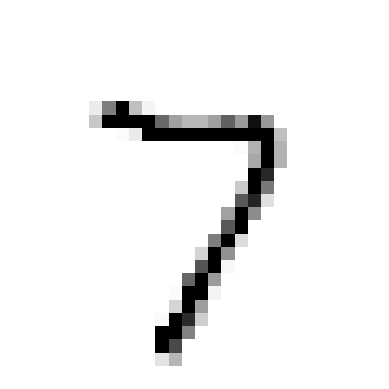

In [179]:
plt.imshow(clean_digit.reshape(28 , 28) , cmap = "binary")
plt.axis("off")
plt.show()